In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Vectors.

A vector has a direction and a length but, generally speaking, does not have a location. The latter allows us to add and subtract vectors. The components of a vector determine the direction and the length of a vector. Thus, when $v$ = [2, 3], the vector can be drawn by moving 2 units in the positive x-direction and 3 units in the positive y-direction. The length of this vector can be found by summing the squares of the individual components and taking the square root of the result. 

A so-called unit, or standard, basis vector is a vector for which all the components except one are zero. The non-zero component is equal to one.  

Thus, $v$ = [1, 0, 0] is a unit basis vector but $w$ = [1, 0, 1] is not.

Note that an arbitrary starting point, the origin at (0, 0), will be used to display the vectors.

### 1. Vector Addition.

As shown by the function `add_vector`, adding two vectors entails adding up the components of the vectors. Graphically this can be visualized by putting the two vectors 'heel to toe' as shown below. The order of addition does not influence the result, as expected.  

Also see: https://www.nsf.gov/news/special_reports/football/vectors.jsp

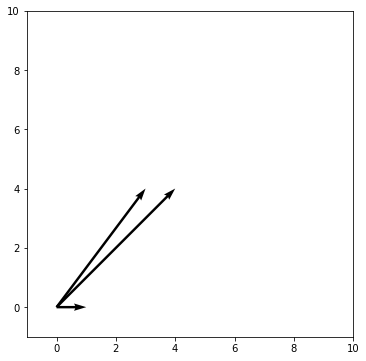

The length of the new vector is: 8.94427191


In [2]:
def add_vector(v, graph=False):
    """
    Input: a list of vector coordinates as tuples
    Output: graph of the individual vectors and the combined vector plus its length
    """
    vectors = np.zeros(shape=(2, 4))
    for idx, tpl in enumerate(v):
        vectors[idx] = [0, 0, tpl[0], tpl[1]]
    
    res = np.sum(vectors, axis=0).reshape(1,4)
    vectors = np.append(vectors, res, axis=0)
    
    if graph == True:
        X, Y, U, V = zip(*vectors)
        plt.figure(figsize=(6,6))
        ax = plt.gca()
        ax.set_aspect(1)
        ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
        ax.set_xlim([-1, 10])
        ax.set_ylim([-1, 10])
        plt.draw()
        plt.show()
    
    return(np.sqrt(res[0][2]**2 + res[0][3]**3))
    
l = add_vector([(1, 0), (3, 4)], True)
print("The length of the new vector is:", l)

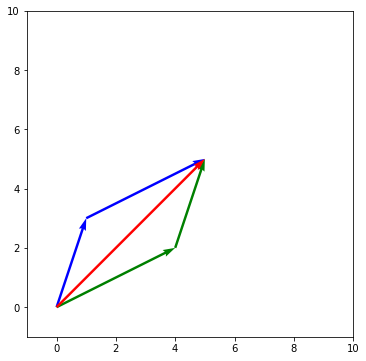

In [3]:
# vectors starting from the origin
vectors = np.array([[0, 0, 1, 3], [0, 0, 4, 2]])
# add vectors starting from the tip of either
vectors = np.append(vectors, np.array([[1, 3, 4, 2], [4, 2, 1, 3]]), axis=0)
# add the vector resulting from addition
vectors = np.append(vectors, np.array([[0,0, 5, 5]]), axis=0)

X, Y, U, V = zip(*vectors)

plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_aspect(1)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color=['b','g','b','g', 'r'], scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

In general, for x, y $\epsilon$ $R{^n}$, x + y = y + x is always true.  
And for x, y, z $\epsilon$ $R{^n}$, (x + y) + z = x + (y + z).   
In addition, for x $\epsilon$ $R{^n}$, x + 0 = x.

### 2. Vector Scaling.

Vectors can be scaled by any (real) number including negative ones. An example of a vector scaled by 2, 0.5, and -0.5, respectively is shown below. Although the graph below shows the scaled vectors in different locations, a scaling operation would typically not alter this.

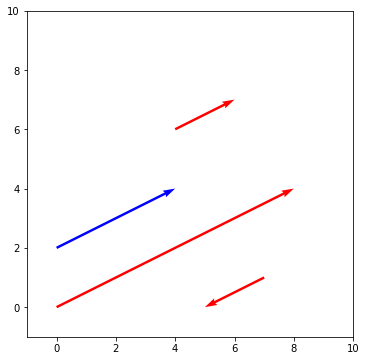

In [4]:
vectors = np.array([[0, 2, 4, 2], [0, 0, 8, 4], [4, 6, 2, 1], [7, 1, -2, -1]])

X, Y, U, V = zip(*vectors)

# Original vector in blue, scaled vectors in red
plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_aspect(1)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color=['b', 'r', 'r', 'r'], scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

### 3. Vector Subtraction.

As can be seen in the graph below, subtracting a vector from another one is essentially adding the negative components of the second vector to the corresponding components of the first vector.  

Let the blue and red vectors represent x and y, respectively. Then, the green vector represents the addition of y to x (resulting in a vector with **components** [7, 0]) while the orange vector represents subtracting y from x (resulting in a vector with **components** [1, -6]).  

Note that the components of the resultant vectors are **not** the same as the coordinates at which they end since, in this particular case, the origin is not the starting point for the original vectors.

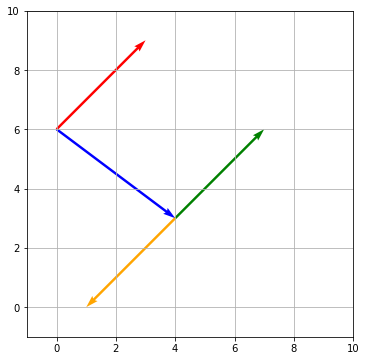

In [5]:
vectors = np.array([[0, 6, 4, -3], [0, 6, 3, 3], [4, 3, 3, 3], [4, 3, -3, -3]])

X, Y, U, V = zip(*vectors)

plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_aspect(1)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color=['b', 'r', 'g', 'orange'], scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])

plt.grid(b=True, which='major')
plt.draw()
plt.show()

## 4. Scaled Vector Addition (AXPY).

The term `axpy` derives from times when Fortran 77 was a popular language to use for vector (and matrix) operations and refers to an operation in which we scale a vector $x$ by $\alpha$ and add the result to another vector $y$.

In [6]:
alpha  = 2
x = np.array([-1, 2, 1])
y = np.array([-2, 3, -3])

print(alpha * x + y)

[-4  7 -1]


Differentiating between row and column vectors in numpy.

In [7]:
# Note the following:
print(np.array([1,2,3]) == np.array([1,2,3]).transpose())

# Using explicit reshape
single_row_vector = np.array([1,2,3]).reshape(1,3)
single_col_vector = np.array([1,2,3]).reshape(3,1)

print('\nRow vector:\n', single_row_vector)
print('Column vector:\n', single_col_vector)

[ True  True  True]

Row vector:
 [[1 2 3]]
Column vector:
 [[1]
 [2]
 [3]]


## 5. Linear Combinations of Vectors.

Let $u$, $v$ $\epsilon$ $R{^m}$ and $\alpha$, $\beta$ $\epsilon$ $R$.  

The following is called a linear combination of the vectors $u$ an $v$ with coefficients $\alpha$ and $\beta$:  

$\alpha*u + \beta*v$ = $\alpha * (v{-0}, v{-1}, ..., v{_{m-1}})$ + $\beta * (u{-0}, u{-1}, ..., u{_{m-1}})$.  

The function `linear_combination` determines the linear combination of vectors with their associated coefficients. Essentially, each vector is scaled by the associated coefficient first and then the vectors are added together.

In [8]:
def linear_combination(vectors, coeffs):
    """
    Inputs: an array of vectors and an array of coefficients
    """
    if (len(vectors) != len(coeffs)):
        return "Invalid dimension(s)"
    res = sum([coeffs[i] * vectors[i] for i in range(len(coeffs))])
    return res

print(linear_combination(np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]), np.array([-3, 2, 4]))) # using basis vectors
print(linear_combination(np.array([[2, 4, -1, 0], [1, 0, 1, 0]]), np.array([3, 2])))

[-3  2  4]
[ 8 12 -1  0]


## 6. Dot or Inner Product (DOT).

Let $x, y \epsilon R{^n}$.  

Let $x$ = [$x{_0}, x{_1}, ..., x{_{n-1}}$] and $y$ = [$y{_0}, y{_1}, ..., y{_{n-1}}$].  

Then the dot product of $x$ and $y$ is given by  

dot(x, y) = $x{_0}y{_0} + x{_1}y{_1} + ... + x{_{n-1}}y{_{n-1}}$ = $\sum_{i=0}^{n-1}x{_i}y{_i}$.  

Basically, the corresponding components of each vector are multiplied together followed by a summation of the respective products.

In [9]:
def dot(vector1, vector2):
    if (len(vector1) != len(vector2)):
        return "Incorrect dimension(s)"
    res = 0
    for i in range(len(vector1)):
        res += vector1[i] * vector2[i]
    return res

print(dot(np.array([2, 5, -6, 1]), np.array([1, 1, 1, 1])))
# or by using numpy
print(np.dot(np.array([2, 5, -6, 1]), np.array([1, 1, 1, 1])))

2
2


The dot product of two vectors, $x$ and $y$, is often written as $x{^T}y$ indicating that $x$ is transposed.  

Note that for two vectors $x, y$ $\epsilon$  $R{^n}$, $x{^T}y$ equals $y{^T}x$.  

In addition, for $x$, $y$, $z$, $\epsilon$  $R{^n}$,  

- $x{^T}(y + z)$ equals $x{^T}y$ + $x{^T}z$ -- always
- $(x + y){^T}z$ equals $x{^T}z$ + $y{^T}z$ -- always
- $(x + y){^T}(x +y)$ = $x{^T}y$ + $2x{^T}$ + $y{^T}y$ -- always
- $x{^T}y$ = 0, therefore $x$ = 0 or $y$ = 0 -- sometimes (!)
- $e{_i}{^T}x$ = $x{^T}e{_i}$ = $X{_i}$ where $X{_i}$ is the i-th component in $x$ -- always

The plot below shows that the dot product of two vectors is zero when the vectors are orthogonal.

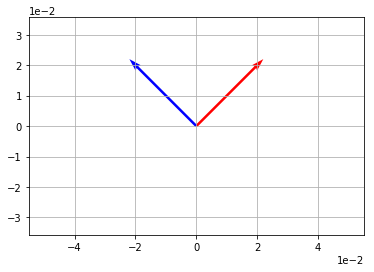

Dot product: 0


In [10]:
v = np.array([2,2])
s = np.array([-2,2])

# Plot v and s
vecs = np.array([v,s])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b'], scale=10)
plt.show()
print('Dot product:', np.dot(v, s))

## 7. Vector Length.

Calculating the magnitude of the vector from its cartesian coordinates requires measuring the distance between the arbitrary starting point and the vector head point. For a two-dimensional vector, we're actually just calculating the length of the hypotenuse in a right-angled triangle - so we could simply invoke Pythagorean theorum and calculate the square root of the sum of the squares of it's components, like this:

\begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2}}\end{equation}

The notation for a vector's magnitude is to surround the vector name with vertical bars - you can use single bars (for example, |**v**|) or double bars (||**v**||). Double-bars are often used to avoid confusion with absolute values. Note that the components of the vector are indicated by subscript indices (v<sub>1</sub>, v<sub>2</sub>,...v<sub>*n*</sub>),

In this case, the vector **v** has two components with values **2** and **1**, so our magnitude calculation is:

\begin{equation}\|\vec{v}\| = \sqrt{2^{2} + 1^{2}}\end{equation}

Which is:

\begin{equation}\|\vec{v}\| = \sqrt{4 + 1}\end{equation}

So:

\begin{equation}\|\vec{v}\| = \sqrt{5} \approx 2.24\end{equation}

In [11]:
v = np.array([3,4])
vMag = math.sqrt(v[0]**2 + v[1]**2)
print (vMag)

5.0


This calculation works for vectors of any dimensionality - you just take the square root of the sum of the squared components:

\begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2} ... + v_{n}\;^{2}}\end{equation}

In Python, *numpy* provides a linear algebra library named **linalg** that makes it easier to work with vectors - you can use the **norm** function in the following code to calculate the magnitude of a vector:

In [12]:
vMag = np.linalg.norm(v)
print (vMag)

5.0


Note that the square root of the dot product of a vector with itself is its length!

In [13]:
assert vMag == np.sqrt(np.dot(v, v)), "Not equal!"

## 8. The Cosine Rule.

A useful property of vector dot product multiplication is that we can use it to calculate the cosine of the angle between two vectors. We could write the dot products as:

$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) $$ 

Which we can rearrange as:

$$ \cos(\theta) = \frac{\vec{v} \cdot \vec{s}}{\|\vec{v} \|\|\vec{s}\|} $$

So for our vectors **v** (2,1) and **s** (-3,2), our calculation looks like this:

$$ \cos(\theta) = \frac{(2 \cdot-3) + (-3 \cdot 2)}{\sqrt{2^{2} + 1^{2}} \times \sqrt{-3^{2} + 2^{2}}} $$

So:

$$\cos(\theta) = \frac{-4}{8.0622577483}$$

Which calculates to:

$$\cos(\theta) = -0.496138938357 $$

So:

$$\theta \approx 119.74 $$

Here's that calculation in Python:

In [14]:
# define our vectors
v = np.array([2,1])
s = np.array([-3,2])

# get the magnitudes
vMag = np.linalg.norm(v)
sMag = np.linalg.norm(s)

# calculate the cosine of theta
cos = (v @ s) / (vMag * sMag) # @ for calculating the dot product

# so theta (in degrees) is:
theta = math.degrees(math.acos(cos))

print(theta)

119.74488129694222
